## هي عن السلاسل الزمنية للطاقة المستهلكة في المنزل لكل بيت انو مثلا كم استهلك المطبخ كم استهلك الغسالة وهكذا وقاعدة البيانات مقطضبة يعني اخدت شهر واحد من 2006 وكم شهر من 2007 والاستهلاك لكل دقيقة

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("household_power_consumption.txt",delimiter=";",na_values=["nan","?",""," ",np.nan])
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.shape

(1436633, 9)

In [ ]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      7
Global_reactive_power    7
Voltage                  7
Global_intensity         7
Sub_metering_1           7
Sub_metering_2           7
Sub_metering_3           7
dtype: int64

## check how many rows have null values for each column

In [ ]:
df.iloc[:,1].notnull().all()

True

In [ ]:
def getnancolumns(data):
  droping_list_all=[]
  for i in range(data.shape[1]):
    if not data.iloc[:,i].notnull().all(): # if df.iloc[:,i].isnull().sum()>0:
      droping_list_all.append(i)
  return droping_list_all

missing_values_col=getnancolumns(df)
print(missing_values_col)

[2, 3, 4, 5, 6, 7, 8]


In [ ]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
def fill_non_values(column):
  mean_value=df[column].astype("float").mean()
  df[column].replace(np.nan,mean_value,inplace=True)

for i in missing_values_col:
  col=df.iloc[:,i]
  fill_non_values(col.name)

In [ ]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97195 entries, 0 to 97194
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   97195 non-null  object 
 1   Time                   97195 non-null  object 
 2   Global_active_power    97195 non-null  float64
 3   Global_reactive_power  97195 non-null  float64
 4   Voltage                97195 non-null  float64
 5   Global_intensity       97195 non-null  float64
 6   Sub_metering_1         97195 non-null  float64
 7   Sub_metering_2         97195 non-null  float64
 8   Sub_metering_3         97195 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.7+ MB


In [5]:
df["Date"]=pd.to_datetime(df["Date"])
df["day name"]=df["Date"].dt.day_name()
df["month name"]=df["Date"].dt.month_name()
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day name,month name
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,December
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,December
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,December
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,December
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,December


In [7]:
new_columns=["kitchen_power","laundry_room_power","heater_air_condition_power"]
old_columns=["Sub_metering_1","Sub_metering_2","Sub_metering_3"]
for i in range(len(old_columns)):
  df.rename(columns={old_columns[i]:new_columns[i]},inplace=True)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen_power,laundry_room_power,heater_air_condition_power,day name,month name
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,December
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,December
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,December
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,December
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,December


## check duplicate columns

In [8]:
df[df.duplicated()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen_power,laundry_room_power,heater_air_condition_power,day name,month name


## the nunique() method returns the number of unique values of each column

In [9]:
df.nunique()

Date                          1442
Time                          1440
Global_active_power           4186
Global_reactive_power          532
Voltage                       2837
Global_intensity               221
kitchen_power                   88
laundry_room_power              81
heater_air_condition_power      32
day name                         7
month name                      12
dtype: int64

In [10]:
pd.options.display.float_format = '{:.4f}'.format
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen_power,laundry_room_power,heater_air_condition_power
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000


count   2049280.0000
mean        240.8399
std           3.2400
min         223.2000
25%         238.9900
50%         241.0100
75%         242.8900
max         254.1500
Name: Voltage, dtype: float64


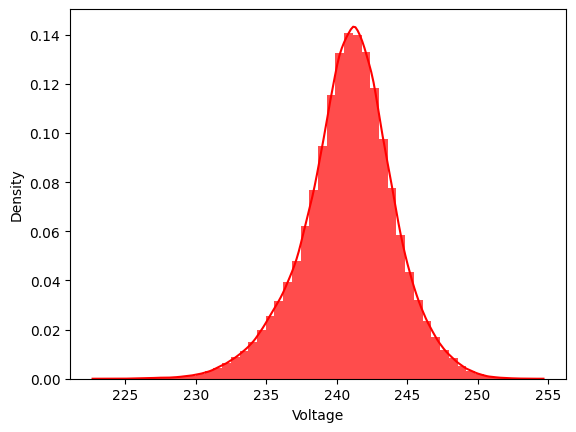

In [11]:
print(df["Voltage"].describe())
sns.distplot(df["Voltage"],color="r",hist_kws={"alpha":0.7})
plt.show()

In [12]:
weekday_power_df=df.groupby("day name",as_index=False).mean()
weekday_power_df

,day name,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen_power,laundry_room_power,heater_air_condition_power
0,Friday,1.0669,0.1220,240.8695,4.5225,1.0068,1.0930,6.6779
1,Monday,1.0305,0.1185,240.8380,4.3698,0.9215,1.1308,6.3635
2,Saturday,1.1889,0.1321,240.7406,5.0402,1.4139,1.4340,7.0574
3,Sunday,1.1724,0.1333,240.8416,4.9769,1.5711,1.6830,6.1202
4,Thursday,1.0242,0.1187,240.9163,4.3377,0.9269,0.9436,6.2279
5,Tuesday,1.0852,0.1209,240.8408,4.6012,0.9179,1.3442,6.4029
6,Wednesday,1.0753,0.1207,240.8308,4.5551,1.1041,1.4670,6.3627


In [13]:
a=df.groupby("day name",as_index=False).agg({"kitchen_power":"mean","laundry_room_power":"mean","heater_air_condition_power":"mean"})
a

,day name,kitchen_power,laundry_room_power,heater_air_condition_power
0,Friday,1.0068,1.0930,6.6779
1,Monday,0.9215,1.1308,6.3635
2,Saturday,1.4139,1.4340,7.0574
3,Sunday,1.5711,1.6830,6.1202
4,Thursday,0.9269,0.9436,6.2279
5,Tuesday,0.9179,1.3442,6.4029
6,Wednesday,1.1041,1.4670,6.3627


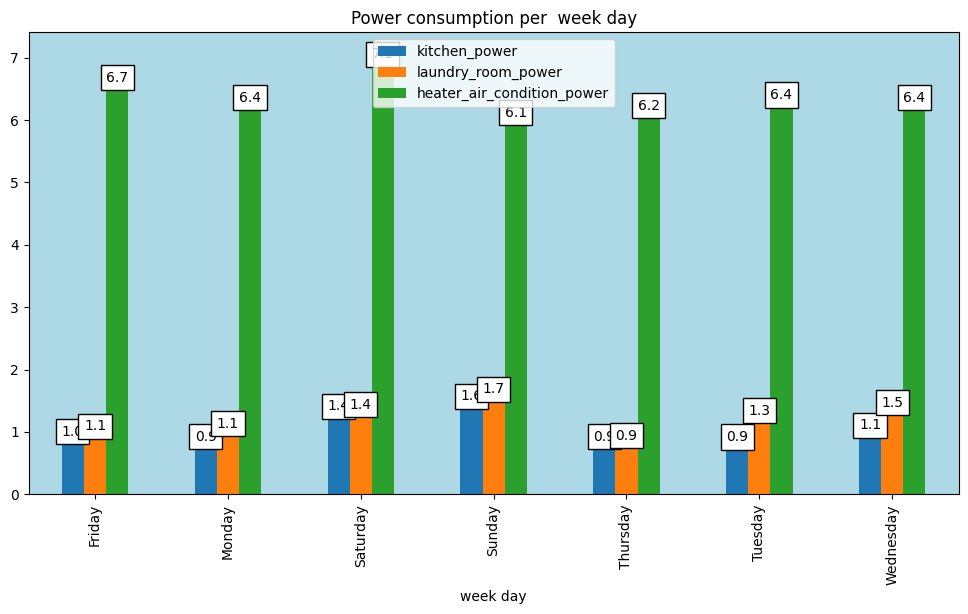

In [17]:
fig=a.set_index("day name").plot.bar(figsize=(12,6))
plt.title("Power consumption per  week day")
plt.xlabel("week day")
plt.gca().set_facecolor("lightblue")

for p in fig.patches:
  fig.annotate(round(p.get_height(),1),(p.get_x()+p.get_width()/2,p.get_height()),ha="center",va="center",bbox=dict(facecolor="white",edgecolor="black"))

In [ ]:
b=df.groupby("month name",as_index=False).agg({"kitchen_power":"mean","laundry_room_power":"mean","heater_air_condition_power":"mean"})
b

,month name,kitchen_power,laundry_room_power,heater_air_condition_power
0,April,1.5424,4.2340,8.8083
1,August,0.7729,0.2892,9.6194
2,December,1.1936,1.9922,7.3474
3,February,1.2164,1.9353,7.0047
4,January,1.5844,1.6739,7.7839
5,July,1.8354,4.0590,8.6097
6,June,0.8753,0.2802,3.5399
7,March,1.6479,1.7073,7.8469
8,May,0.8260,1.0219,5.3649
9,November,1.3222,2.4080,8.8642


In [ ]:
from pandas.api.types import CategoricalDtype
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cat_type = CategoricalDtype(categories=months, ordered=True)
b['month name'] = b['month name'].astype(cat_type)
b = b.sort_values('month name')
b

,month name,kitchen_power,laundry_room_power,heater_air_condition_power
4,January,1.5844,1.6739,7.7839
3,February,1.2164,1.9353,7.0047
7,March,1.6479,1.7073,7.8469
0,April,1.5424,4.2340,8.8083
8,May,0.8260,1.0219,5.3649
6,June,0.8753,0.2802,3.5399
5,July,1.8354,4.0590,8.6097
1,August,0.7729,0.2892,9.6194
11,September,0.5861,2.5389,6.7917
10,October,2.0285,2.5302,8.8253


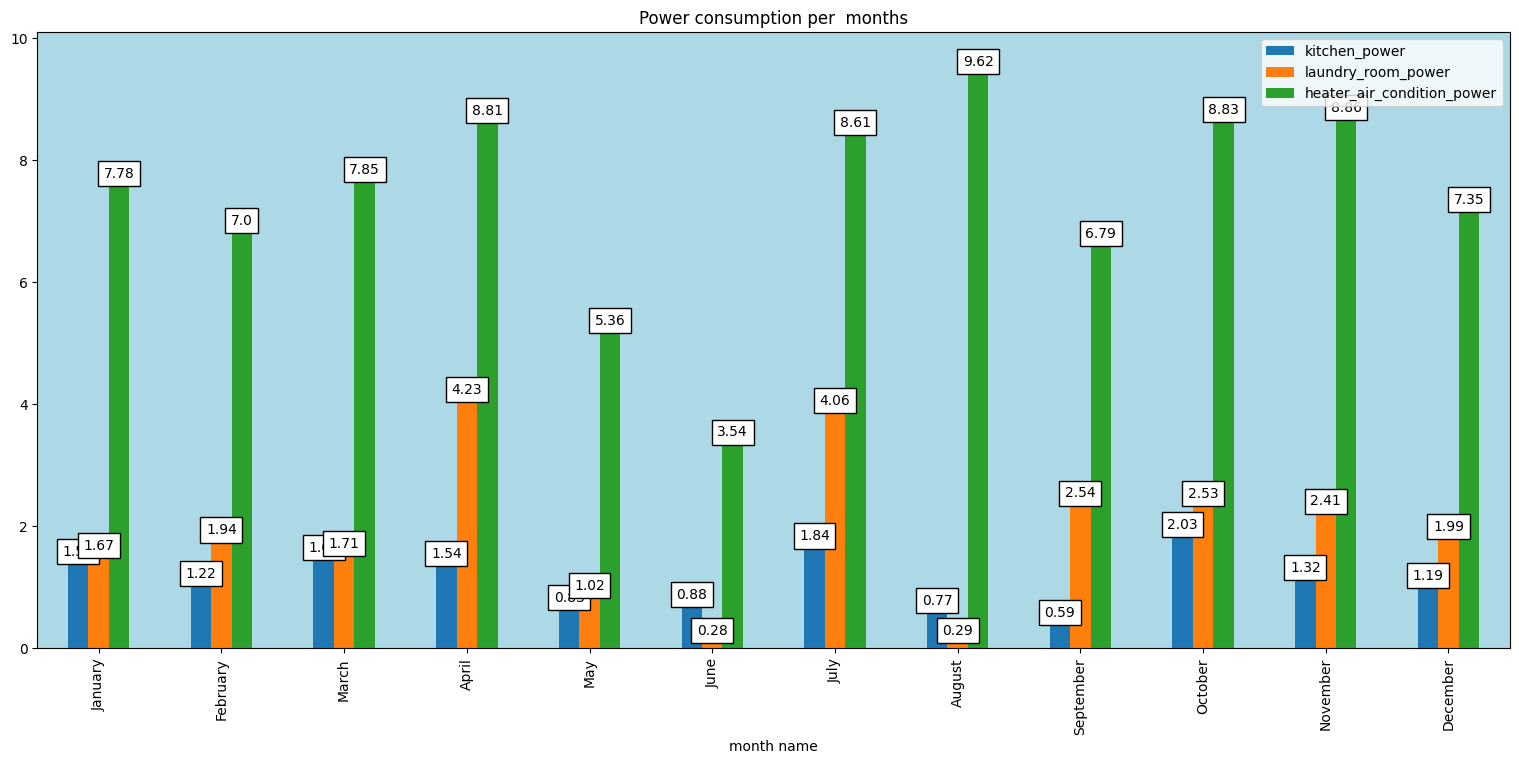

In [ ]:
fig=b.set_index("month name").plot.bar(figsize=(19,8))
plt.title("Power consumption per  months")
plt.xlabel("month name")
plt.gca().set_facecolor("lightblue")

for p in fig.patches:
  fig.annotate(round(p.get_height(),2),(p.get_x()+p.get_width()/2,p.get_height()),ha="center",va="center",bbox=dict(facecolor="white",edgecolor="black"))

In [ ]:
float_columns=['Global_active_power', 'Global_reactive_power', 'Voltage', 'kitchen_power', 'laundry_room_power','heater_air_condition_power']

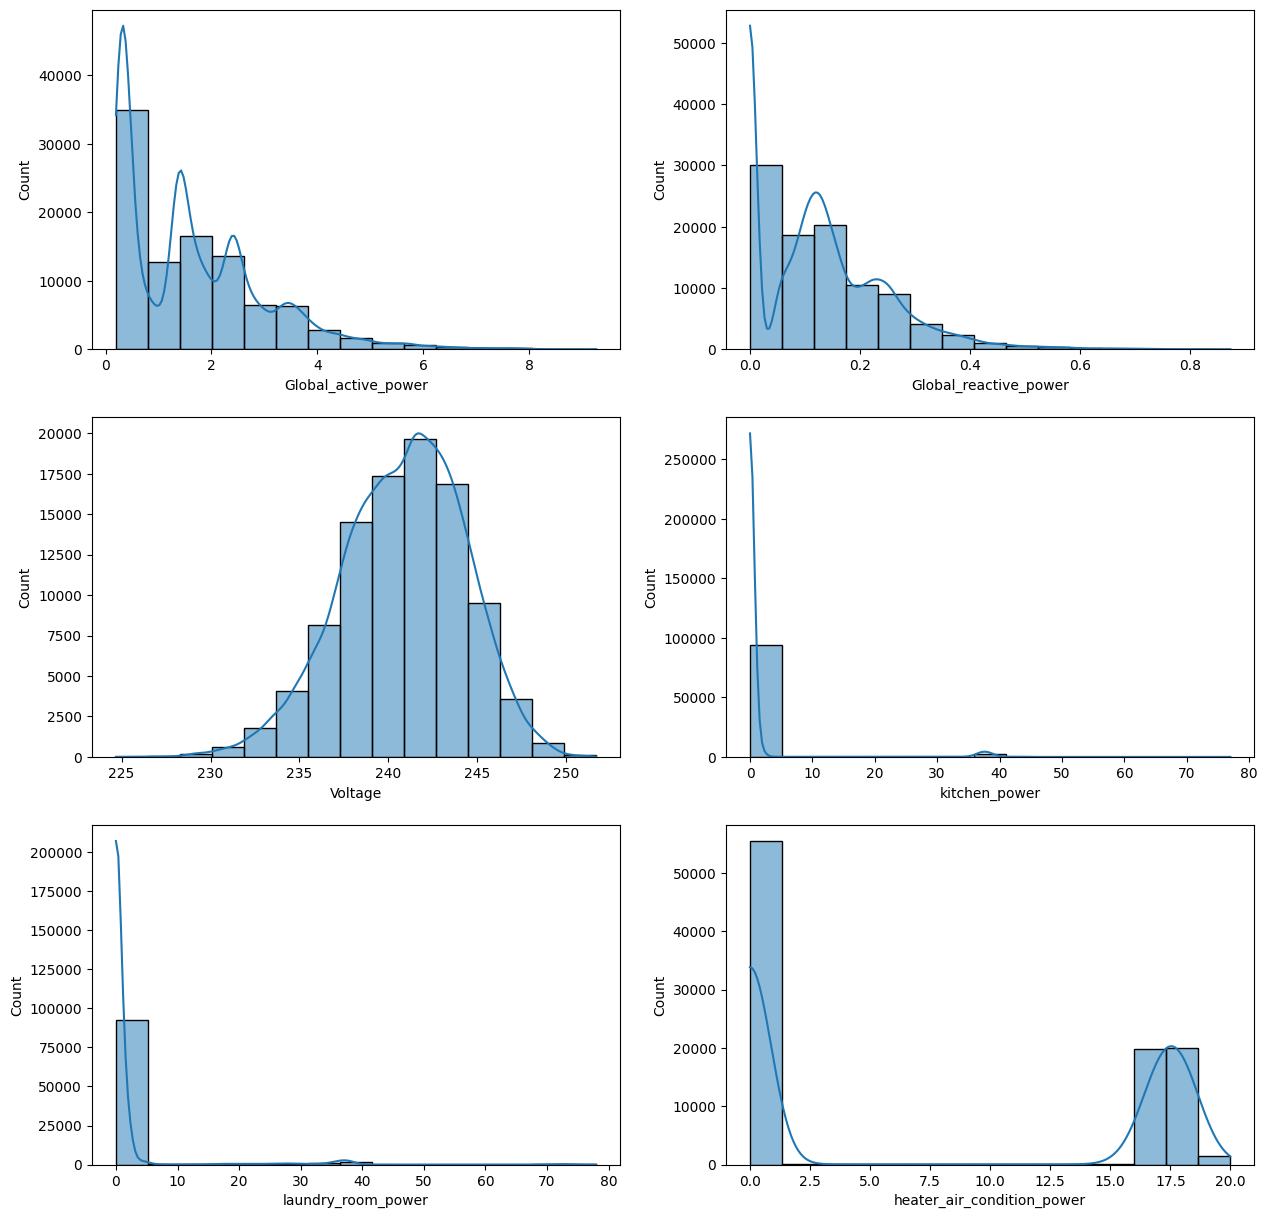

In [ ]:
row,col=(3,2)
fig,axes=plt.subplots(row,col,figsize=(15,15))
o=0
for i in range(row):
  for j in range(col):
    sns.histplot(ax=axes[i,j],data=df,x=float_columns[o],bins=15,kde=True)
    o+=1
plt.show()

In [ ]:
dfn=df.set_index("Date")

## global consumption per month

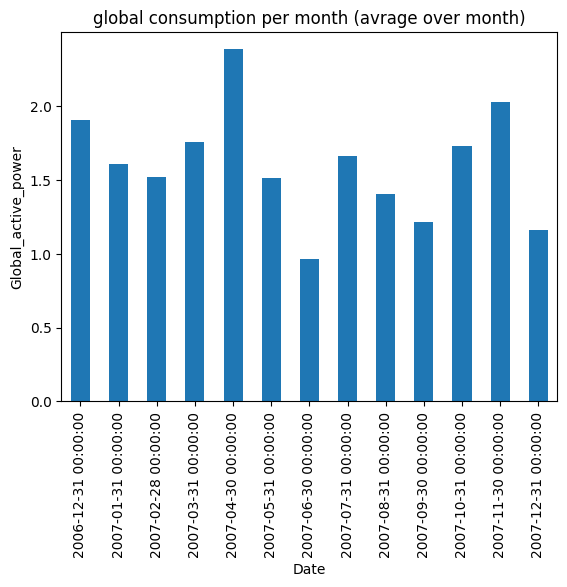

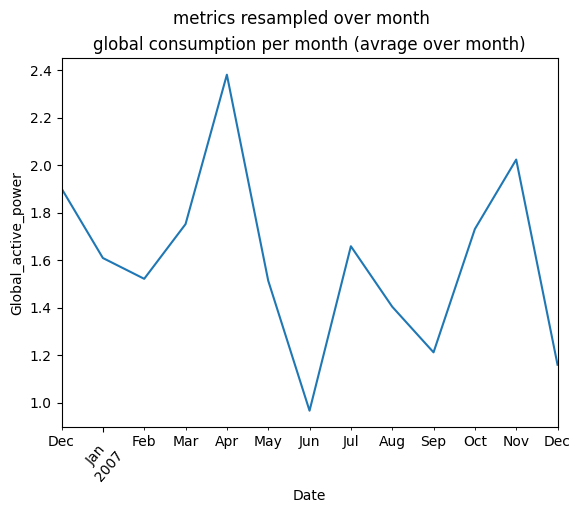

In [ ]:
dfn['Global_active_power'].resample("M").mean().plot(kind="bar")
plt.xticks(rotation=90)
plt.ylabel("Global_active_power")
plt.title("global consumption per month (avrage over month)")
plt.show()
dfn['Global_active_power'].resample("M").mean().plot(kind="line")
plt.xticks(rotation=50)
plt.ylabel("Global_active_power")
plt.title("global consumption per month (avrage over month)")
plt.suptitle("metrics resampled over month")
plt.show()